# **CAPSTONE PROJECT 2**
## **PAKISTAN'S LARGEST E-COMMERCE DATASET**
BY : JESSICA SEANJAYA

## **Latar Belakang**

Seorang pengusaha merekrut seorang 'data analyst' untuk dapat mengetahui produk yang akan dijual, produk ini rencananya akan dipasarkan di Pakistan melalui e-commerce.
Untuk menemukan insight tersebut, data analyst diminta untuk melakukan analisa pada free data tentang penjualan produk di e-commerce Pakistan pada bulan Juli 2016 hingga Agustus 2018.

## **Penyelesaian Masalah** 

Pengusaha ingin mengetahui **produk apa saja yang merupakan produk dengan penjualan tertinggi di e-commerce.** Tentunya informasi ini akan sangat berguna untuk menentukan produk apa yang akan dijual di e-commerce Pakistan serta kapan periode yang paling tepat untuk menjual produk tersebut. 
Sebagai seorang data analyst saya akan mencoba menjawab beberapa pertanyaan sebagai berikut:
1. Kapan periode transaksi paling tinggi ?
2. Apakah kategori produk paling laku (best-selling item) ?
3. Apakah metode pembayaran yang paling sering digunakan ?
4. Bagaimana kondisi status transaksi dari periode Juni 2016 hingga Agustus 2018 ?
5. Apakah terdapat hubungan antara metode pembayaran dan status pemesanan ?
6. Kapan periode diskon diberikan paling banyak ? 

## **Data**

Untuk dapat menjawab pertanyaan di atas, kita akan menganalisa data transaksi melalui e-commerce di Pakistan pada bulan Juli 2016 hingga Agustus 2018 yang dapat diakses [disini](https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('E:\Purwadhika\Course\Module2\Capstone Project 2\Pakistan Largest Ecommerce Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

Dataset ini berisi informasi kolom sebagai berikut:
1. item_id = kode identitas pemesanan
2. status = status pemesanan
3. created_at = tanggal pesanan
4. sku = kode produk
5. price = harga produk
6. qty_ordered = kuantitas barang yang dipesan
7. grand_total = total harga pemesanan
8. increment_id = kode struk
9. category_name_1 = kategori barang
10. sales_commission_code = kode komisi penjualan
11. discount_amount = jumlah diskon yang diberikan
12. payment_method = metode pembayaran
13. Working Date = tanggal kerja
14. BI Status = kategori harga produk
15. MV = total harga pemesanan
16. Year = tahun transaksi
17. Month = bulan transaksi
18. Customer Since = bulan dan tahun customer bergabung
19. M-Y = tahun dan bulan transaksi
20. FY = tahun fiskal perusahaan
21. Customer ID = kode customer

Berdasarkan data di atas dapat kita temukan beberapa kolom yang memiliki nilai kosong, serta untuk kolom ke 21-25 tidak memiliki value (jumlah value = 0). Oleh karena itu, akan kita lakukan Data Cleaning sesuai dengan data apa saja yang akan kita gunakan dalam analisa ini.

## **A. Data Cleaning**

1. Pada data cleaning ini, kita akan menghapus data-data yang memiliki nilai kosong yaitu kolom-kolom : Unnamed: 21 -25.

In [4]:
df1 = df.drop(df.columns[[21, 22, 23, 24, 25]], axis=1)

In [5]:
df1.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


2. Berdasarkan tabel di atas, dapat kita ketahui bahwa terdapat rows yang kosong, di tahap ini akan kita lihat berapa jumlah nilai yang kosong dan selanjutnya akan kita eliminasi.

In [6]:
df1.dropna(subset='item_id', inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-nu

3. Selanjutnya, kita akan menghapus data yang tidak berkaitan dengan analisa ini terutama yang memiliki nilai kosong, contohnya adalah sales_commission_code dimana nilai ini memberikan kontribusi nilai kosong yang cukup banyak serta tidak akan digunakan pada analisa ini, seperti:
- sales_commision_code
- Customer Since
- Customer ID
- sku
- BI Status
- FY
- increment_id    
Adapun terdapat nilai-nilai yang bersifat redundant / berulang, sehingga dapat dieliminasi karna informasi yang sama sudah tercantum pada tabel tersebut:
- MV    = grand_total
- Working Date = created_at

In [7]:
df1.drop(['sales_commission_code', 'Customer Since', 'Customer ID', 'sku', 'BI Status', 'FY', 'increment_id', 'Working Date', ' MV '], axis = 1, inplace=True)

4. Kolom 'created_at' dan 'M-Y' masih berbentuk 'object', kita ubah menjadi bentuk 'datetime'.

In [8]:
df1['created_at'] = pd.to_datetime(df1['created_at'])
df1['M-Y'] = pd.to_datetime(df1['M-Y'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   item_id          584524 non-null  float64       
 1   status           584509 non-null  object        
 2   created_at       584524 non-null  datetime64[ns]
 3   price            584524 non-null  float64       
 4   qty_ordered      584524 non-null  float64       
 5   grand_total      584524 non-null  float64       
 6   category_name_1  584360 non-null  object        
 7   discount_amount  584524 non-null  float64       
 8   payment_method   584524 non-null  object        
 9   Year             584524 non-null  float64       
 10  Month            584524 non-null  float64       
 11  M-Y              584524 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(7), object(3)
memory usage: 58.0+ MB


5. Dapat dilihat bahwa kolom category name dan status memberikan jumlah missing value yang cukup banyak, mengingat kedua kolom ini berisikan data kategori sehingga missing value tersebut akan kita isi dengan nilai modus.

In [9]:
df1['category_name_1'].mode()

0    Mobiles & Tablets
Name: category_name_1, dtype: object

In [10]:
df1['category_name_1'] = df1['category_name_1'].fillna('Mobiles & Tablets')

In [11]:
df1['status'].mode()

0    complete
Name: status, dtype: object

In [12]:
df1['status'] = df1['status'].fillna('complete')

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   item_id          584524 non-null  float64       
 1   status           584524 non-null  object        
 2   created_at       584524 non-null  datetime64[ns]
 3   price            584524 non-null  float64       
 4   qty_ordered      584524 non-null  float64       
 5   grand_total      584524 non-null  float64       
 6   category_name_1  584524 non-null  object        
 7   discount_amount  584524 non-null  float64       
 8   payment_method   584524 non-null  object        
 9   Year             584524 non-null  float64       
 10  Month            584524 non-null  float64       
 11  M-Y              584524 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(7), object(3)
memory usage: 58.0+ MB


6. Terdapat 7850 (1,34%) kolom 'category_name_1' yang memiliki nilai 'N/', kami berasumsi kategori '/N/' merupakan kategori barang yang tidak dapat dimasukkan ke dalam list kategori yang ada dan bukan merupakan kategori 'Others', sehingga dapat kita asumsikan bahwa nilai tersebut adalah outliers. Adapun jumlah nilai tersebut kurang dari 10%, sehingga data tersebut akan dihilangkan.

In [14]:
df1[df1['category_name_1']=='\\N']

,item_id,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,M-Y
24,211157.0,order_refunded,2016-07-01,1000.0,1.0,0.0,\N,0.0,customercredit,2016.0,7.0,2016-07-01
72,211214.0,canceled,2016-07-01,1.0,1.0,1.0,\N,0.0,cod,2016.0,7.0,2016-07-01
79,211222.0,canceled,2016-07-01,1.0,5.0,5.0,\N,0.0,cod,2016.0,7.0,2016-07-01
80,211223.0,canceled,2016-07-01,1.0,2.0,2.0,\N,0.0,cod,2016.0,7.0,2016-07-01
81,211225.0,canceled,2016-07-01,1.0,1.0,1.0,\N,0.0,cod,2016.0,7.0,2016-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...
423207,722206.0,order_refunded,2017-12-27,90.0,2.0,330.0,\N,0.0,cod,2017.0,12.0,2017-12-01
423231,722242.0,cod,2017-12-27,99.0,1.0,249.0,\N,0.0,cod,2017.0,12.0,2017-12-01
423826,722915.0,order_refunded,2017-12-29,90.0,2.0,330.0,\N,0.0,cod,2017.0,12.0,2017-12-01
423829,722918.0,order_refunded,2017-12-29,99.0,2.0,348.0,\N,0.0,cod,2017.0,12.0,2017-12-01


In [15]:
df1.drop(df1[df1['category_name_1']=='\\N'].index, inplace=True)

7. Selanjutnya kita akan mengelompokkan data di kolom 'payment_method' karena beberapa data memiliki nilai yang sama, seperti: 
- 'cashatdoorstep' = 'cod'
- 'Easypay_MA' = 'Easypay'
- 'jazzvoucher' = 'jazzwallet'

In [16]:
df1['payment_method'].unique()

array(['cod', 'ublcreditcard', 'mygateway', 'customercredit',
       'cashatdoorstep', 'mcblite', 'internetbanking', 'productcredit',
       'financesettlement', 'Payaxis', 'marketingexpense', 'jazzvoucher',
       'jazzwallet', 'Easypay', 'Easypay_MA', 'easypay_voucher',
       'bankalfalah', 'apg'], dtype=object)

In [17]:
new_payment_method = {'cod' :'cod', 'Easypay_MA': 'Easypay', 'easypay_voucher':'Easypay', 'jazzvoucher': 'jazzwallet'}
df1=df1.replace({'payment_method': new_payment_method})

8. Selanjutnya, kita amati distribusi nilai pada data.

In [18]:
df1.describe(include=[object])

,status,category_name_1,payment_method
count,576674,576674,576674
unique,15,15,15
top,complete,Mobiles & Tablets,cod
freq,230473,115874,267935


In [19]:
df1.describe(exclude=[object])

,item_id,created_at,price,qty_ordered,grand_total,discount_amount,Year,Month,M-Y
count,576674.000000,576674,5.766740e+05,576674.000000,5.766740e+05,576674.000000,576674.000000,576674.000000,576674
unique,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,26
top,NaN,2016-11-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01 00:00:00
freq,NaN,14929,NaN,NaN,NaN,NaN,NaN,NaN,83829
first,NaN,2016-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-01 00:00:00
last,NaN,2018-08-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-01 00:00:00
mean,568938.450584,NaN,6.378707e+03,1.297307,8.584611e+03,503.153802,2017.054821,7.148139,NaN
std,199151.731073,NaN,1.500483e+04,4.005791,6.172160e+04,1510.445479,0.704289,3.488570,NaN
min,211131.000000,NaN,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,NaN
25%,400876.250000,NaN,3.600000e+02,1.000000,9.519900e+02,0.000000,2017.000000,4.000000,NaN


9. Berdasarkan informasi di atas,  terdapat data yang bernilai negatif pada kolom 'grand_total' dan 'discount_amount' serta nilai 0 pada kolom 'price', dimana hal ini cukup janggal mengingat dalam transaksi e-commerce nilai tersebut seharusnya mempunyai nilai dan bernilai positif.   
Oleh karena itu untuk discount amount akan kita lakukan perubahan nilai negatif menjadi nilai positif dengan metode absolut. Hal ini dilatarbelakangi dengan asumsi bahwa terjadi kesalahan input data yang seharusnya bernilai positif.

In [20]:
df1['discount_amount']= df1['discount_amount'].abs()

In [21]:
df1.describe(exclude=[object])

,item_id,created_at,price,qty_ordered,grand_total,discount_amount,Year,Month,M-Y
count,576674.000000,576674,5.766740e+05,576674.000000,5.766740e+05,576674.000000,576674.000000,576674.000000,576674
unique,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,26
top,NaN,2016-11-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01 00:00:00
freq,NaN,14929,NaN,NaN,NaN,NaN,NaN,NaN,83829
first,NaN,2016-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-01 00:00:00
last,NaN,2018-08-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-01 00:00:00
mean,568938.450584,NaN,6.378707e+03,1.297307,8.584611e+03,503.155888,2017.054821,7.148139,NaN
std,199151.731073,NaN,1.500483e+04,4.005791,6.172160e+04,1510.444784,0.704289,3.488570,NaN
min,211131.000000,NaN,0.000000e+00,1.000000,-1.594000e+03,0.000000,2016.000000,1.000000,NaN
25%,400876.250000,NaN,3.600000e+02,1.000000,9.519900e+02,0.000000,2017.000000,4.000000,NaN


10. Terdapat nilai 'price' dan 'grand_total' yang bernilai 0, padahal nilai 'qty_ordered' tidak bernilai 0, hal ini diasumsikan sebagai outliers dengan jumlah sebanyak 149 baris (0,026%), sehingga data tersebut kita eliminasi.

In [22]:
df1[(df1['price'] == 0) & (df1['grand_total']== 0)]

,item_id,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,M-Y
6598,218538.0,canceled,2016-07-26,0.0,1.0,0.0,Appliances,0.00,cod,2016.0,7.0,2016-07-01
6603,218542.0,canceled,2016-07-26,0.0,1.0,0.0,Appliances,0.00,cod,2016.0,7.0,2016-07-01
7004,218988.0,canceled,2016-07-27,0.0,1.0,0.0,Appliances,0.00,cod,2016.0,7.0,2016-07-01
8298,220494.0,canceled,2016-07-29,0.0,1.0,0.0,Kids & Baby,0.00,cod,2016.0,7.0,2016-07-01
8333,220540.0,canceled,2016-07-29,0.0,10.0,0.0,Kids & Baby,0.00,cod,2016.0,7.0,2016-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...
428961,728647.0,complete,2018-01-09,0.0,2.0,0.0,Beauty & Grooming,0.00,customercredit,2018.0,1.0,2018-01-01
453450,756090.0,complete,2018-02-20,0.0,1.0,0.0,Books,0.00,customercredit,2018.0,2.0,2018-02-01
492682,802892.0,order_refunded,2018-03-27,0.0,5.0,0.0,Home & Living,0.00,customercredit,2018.0,3.0,2018-03-01
497665,809191.0,paid,2018-03-28,0.0,5.0,0.0,Home & Living,199.99,customercredit,2018.0,3.0,2018-03-01


In [23]:
c = df1[(df1['price'] == 0) & (df1['grand_total']== 0)].index
df1.drop(c, inplace=True)

11. Terdapat kolom 'price' yang memiliki nilai 0 sebanyak 2054 baris (0,36%), terhadap data tersebut kita akan isi menggunakan perhitungan sebagai berikut:  
**price = (grand_total + discount_amout) / qty_ordered**

In [24]:
df1[df1['price'] <= 0]

,item_id,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,M-Y
8358,220568.0,complete,2016-07-29,0.0,2.0,685.0,Kids & Baby,0.0,cod,2016.0,7.0,2016-07-01
8771,221032.0,complete,2016-07-31,0.0,1.0,55.0,Kids & Baby,0.0,cod,2016.0,7.0,2016-07-01
11054,224392.0,complete,2016-08-05,0.0,1.0,70.0,Soghaat,0.0,cod,2016.0,8.0,2016-08-01
12165,226019.0,complete,2016-08-08,0.0,1.0,70.0,Soghaat,0.0,cod,2016.0,8.0,2016-08-01
12360,226329.0,complete,2016-08-08,0.0,1.0,155.0,Soghaat,0.0,cod,2016.0,8.0,2016-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...
584260,904901.0,cod,2018-08-27,0.0,2.0,150.0,Computing,0.0,cod,2018.0,8.0,2018-08-01
584261,904902.0,cod,2018-08-27,0.0,2.0,150.0,Computing,0.0,cod,2018.0,8.0,2018-08-01
584264,904906.0,cod,2018-08-27,0.0,2.0,150.0,Computing,0.0,cod,2018.0,8.0,2018-08-01
584270,904916.0,cod,2018-08-27,0.0,2.0,150.0,Computing,0.0,cod,2018.0,8.0,2018-08-01


In [25]:
f = df1[df1['price'] <= 0]
f['price'] = ((f['grand_total']) + (f['discount_amount'])) / (f['qty_ordered'])
f

,item_id,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,M-Y
8358,220568.0,complete,2016-07-29,342.5,2.0,685.0,Kids & Baby,0.0,cod,2016.0,7.0,2016-07-01
8771,221032.0,complete,2016-07-31,55.0,1.0,55.0,Kids & Baby,0.0,cod,2016.0,7.0,2016-07-01
11054,224392.0,complete,2016-08-05,70.0,1.0,70.0,Soghaat,0.0,cod,2016.0,8.0,2016-08-01
12165,226019.0,complete,2016-08-08,70.0,1.0,70.0,Soghaat,0.0,cod,2016.0,8.0,2016-08-01
12360,226329.0,complete,2016-08-08,155.0,1.0,155.0,Soghaat,0.0,cod,2016.0,8.0,2016-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...
584260,904901.0,cod,2018-08-27,75.0,2.0,150.0,Computing,0.0,cod,2018.0,8.0,2018-08-01
584261,904902.0,cod,2018-08-27,75.0,2.0,150.0,Computing,0.0,cod,2018.0,8.0,2018-08-01
584264,904906.0,cod,2018-08-27,75.0,2.0,150.0,Computing,0.0,cod,2018.0,8.0,2018-08-01
584270,904916.0,cod,2018-08-27,75.0,2.0,150.0,Computing,0.0,cod,2018.0,8.0,2018-08-01


In [26]:
df1[df1['price'] <= 0]

,item_id,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,M-Y
8358,220568.0,complete,2016-07-29,0.0,2.0,685.0,Kids & Baby,0.0,cod,2016.0,7.0,2016-07-01
8771,221032.0,complete,2016-07-31,0.0,1.0,55.0,Kids & Baby,0.0,cod,2016.0,7.0,2016-07-01
11054,224392.0,complete,2016-08-05,0.0,1.0,70.0,Soghaat,0.0,cod,2016.0,8.0,2016-08-01
12165,226019.0,complete,2016-08-08,0.0,1.0,70.0,Soghaat,0.0,cod,2016.0,8.0,2016-08-01
12360,226329.0,complete,2016-08-08,0.0,1.0,155.0,Soghaat,0.0,cod,2016.0,8.0,2016-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...
584260,904901.0,cod,2018-08-27,0.0,2.0,150.0,Computing,0.0,cod,2018.0,8.0,2018-08-01
584261,904902.0,cod,2018-08-27,0.0,2.0,150.0,Computing,0.0,cod,2018.0,8.0,2018-08-01
584264,904906.0,cod,2018-08-27,0.0,2.0,150.0,Computing,0.0,cod,2018.0,8.0,2018-08-01
584270,904916.0,cod,2018-08-27,0.0,2.0,150.0,Computing,0.0,cod,2018.0,8.0,2018-08-01


In [27]:
df2 = df1
e= df2[df2['price'] <= 0].index
df2.drop(e,axis=0, inplace=True)

In [28]:
df3 = df2.append(f)
df3

,item_id,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,M-Y
0,211131.0,complete,2016-07-01,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,2016.0,7.0,2016-07-01
1,211133.0,canceled,2016-07-01,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,2016.0,7.0,2016-07-01
2,211134.0,canceled,2016-07-01,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,2016.0,7.0,2016-07-01
3,211135.0,complete,2016-07-01,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,2016.0,7.0,2016-07-01
4,211136.0,order_refunded,2016-07-01,555.0,2.0,1110.0,Soghaat,0.0,cod,2016.0,7.0,2016-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...
584260,904901.0,cod,2018-08-27,75.0,2.0,150.0,Computing,0.0,cod,2018.0,8.0,2018-08-01
584261,904902.0,cod,2018-08-27,75.0,2.0,150.0,Computing,0.0,cod,2018.0,8.0,2018-08-01
584264,904906.0,cod,2018-08-27,75.0,2.0,150.0,Computing,0.0,cod,2018.0,8.0,2018-08-01
584270,904916.0,cod,2018-08-27,75.0,2.0,150.0,Computing,0.0,cod,2018.0,8.0,2018-08-01


13. Dapat dilihat bahwa kolom 'grand_total' memiliki lebih banyak nilai yang 0 yaitu sebesar 9454 rows (1,64%) sehingga akan dilakukan normalisasi nilai dari perhitungan sbb:  
**grand_total = price * qty_ordered - discount_amount**

In [29]:
df3[df3['grand_total'] <= 0]

,item_id,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,M-Y
14,211146.0,complete,2016-07-01,320.0,1.0,0.0,Beauty & Grooming,0.0,customercredit,2016.0,7.0,2016-07-01
27,211162.0,complete,2016-07-01,500.0,1.0,0.0,Others,0.0,customercredit,2016.0,7.0,2016-07-01
28,211163.0,complete,2016-07-01,100.0,5.0,0.0,Others,0.0,customercredit,2016.0,7.0,2016-07-01
266,211422.0,complete,2016-07-01,995.0,1.0,0.0,Computing,0.0,customercredit,2016.0,7.0,2016-07-01
313,211472.0,complete,2016-07-01,320.0,1.0,0.0,Beauty & Grooming,0.0,customercredit,2016.0,7.0,2016-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...
584263,904904.0,paid,2018-08-27,837.0,1.0,0.0,Men's Fashion,0.0,customercredit,2018.0,8.0,2018-08-01
584368,905028.0,paid,2018-08-27,20599.0,1.0,0.0,Entertainment,0.0,customercredit,2018.0,8.0,2018-08-01
584405,905080.0,paid,2018-08-27,799.0,1.0,0.0,Men's Fashion,0.0,customercredit,2018.0,8.0,2018-08-01
584514,905196.0,paid,2018-08-28,1299.0,1.0,0.0,Men's Fashion,0.0,customercredit,2018.0,8.0,2018-08-01


In [30]:
g = df3[df3['grand_total'] <= 0]
g['grand_total'] = ((g['price']) * (g['qty_ordered'])) - (g['discount_amount'])
g

,item_id,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,M-Y
14,211146.0,complete,2016-07-01,320.0,1.0,320.0,Beauty & Grooming,0.0,customercredit,2016.0,7.0,2016-07-01
27,211162.0,complete,2016-07-01,500.0,1.0,500.0,Others,0.0,customercredit,2016.0,7.0,2016-07-01
28,211163.0,complete,2016-07-01,100.0,5.0,500.0,Others,0.0,customercredit,2016.0,7.0,2016-07-01
266,211422.0,complete,2016-07-01,995.0,1.0,995.0,Computing,0.0,customercredit,2016.0,7.0,2016-07-01
313,211472.0,complete,2016-07-01,320.0,1.0,320.0,Beauty & Grooming,0.0,customercredit,2016.0,7.0,2016-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...
584263,904904.0,paid,2018-08-27,837.0,1.0,837.0,Men's Fashion,0.0,customercredit,2018.0,8.0,2018-08-01
584368,905028.0,paid,2018-08-27,20599.0,1.0,20599.0,Entertainment,0.0,customercredit,2018.0,8.0,2018-08-01
584405,905080.0,paid,2018-08-27,799.0,1.0,799.0,Men's Fashion,0.0,customercredit,2018.0,8.0,2018-08-01
584514,905196.0,paid,2018-08-28,1299.0,1.0,1299.0,Men's Fashion,0.0,customercredit,2018.0,8.0,2018-08-01


In [31]:
df4 = df3
h = df4[df4['grand_total'] <= 0].index
df4.drop (h, axis = 0, inplace=True)

In [32]:
df5= df4.append(g)
df5

,item_id,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,M-Y
0,211131.0,complete,2016-07-01,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,2016.0,7.0,2016-07-01
1,211133.0,canceled,2016-07-01,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,2016.0,7.0,2016-07-01
2,211134.0,canceled,2016-07-01,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,2016.0,7.0,2016-07-01
3,211135.0,complete,2016-07-01,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,2016.0,7.0,2016-07-01
4,211136.0,order_refunded,2016-07-01,555.0,2.0,1110.0,Soghaat,0.0,cod,2016.0,7.0,2016-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...
584263,904904.0,paid,2018-08-27,837.0,1.0,837.0,Men's Fashion,0.0,customercredit,2018.0,8.0,2018-08-01
584368,905028.0,paid,2018-08-27,20599.0,1.0,20599.0,Entertainment,0.0,customercredit,2018.0,8.0,2018-08-01
584405,905080.0,paid,2018-08-27,799.0,1.0,799.0,Men's Fashion,0.0,customercredit,2018.0,8.0,2018-08-01
584514,905196.0,paid,2018-08-28,1299.0,1.0,1299.0,Men's Fashion,0.0,customercredit,2018.0,8.0,2018-08-01


In [33]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576525 entries, 0 to 584515
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   item_id          576525 non-null  float64       
 1   status           576525 non-null  object        
 2   created_at       576525 non-null  datetime64[ns]
 3   price            576525 non-null  float64       
 4   qty_ordered      576525 non-null  float64       
 5   grand_total      576525 non-null  float64       
 6   category_name_1  576525 non-null  object        
 7   discount_amount  576525 non-null  float64       
 8   payment_method   576525 non-null  object        
 9   Year             576525 non-null  float64       
 10  Month            576525 non-null  float64       
 11  M-Y              576525 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(7), object(3)
memory usage: 57.2+ MB


14. Terdapat 1887 (0,33%) nilai 'grand_total' yang bernilai kurang dari 0, selanjutnya akan kita eliminasi dengan asumsi tidak ada pembelanjaan yang gratis pada data ini.

In [34]:
df5[df5['grand_total'] <= 0]

,item_id,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,M-Y
1287,212614.0,complete,2016-07-05,65.0,3.0,0.00,Home & Living,195.00,cod,2016.0,7.0,2016-07-01
1288,212615.0,complete,2016-07-05,142.0,1.0,0.00,Home & Living,142.00,cod,2016.0,7.0,2016-07-01
1289,212616.0,complete,2016-07-05,55.0,1.0,0.00,Home & Living,55.00,cod,2016.0,7.0,2016-07-01
1290,212617.0,complete,2016-07-05,91.0,2.0,0.00,Home & Living,182.00,cod,2016.0,7.0,2016-07-01
1291,212618.0,complete,2016-07-05,180.0,1.0,0.00,Home & Living,180.00,cod,2016.0,7.0,2016-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...
571271,890221.0,complete,2018-07-27,180.0,1.0,-432.60,Superstore,612.60,bankalfalah,2018.0,7.0,2018-07-01
571272,890222.0,complete,2018-07-27,450.0,1.0,-162.60,Superstore,612.60,bankalfalah,2018.0,7.0,2018-07-01
571273,890223.0,complete,2018-07-27,98.0,4.0,-220.60,Health & Sports,612.60,bankalfalah,2018.0,7.0,2018-07-01
571274,890224.0,complete,2018-07-27,475.0,1.0,-137.60,Soghaat,612.60,bankalfalah,2018.0,7.0,2018-07-01


In [35]:
j = df5[df5['grand_total'] <= 0].index
df5.drop (j,axis=0, inplace=True)

### **RECHECK**

Selanjutnya kita lakukan recheck apakah masih terdapat missing value, data duplikat, dan outliers.

In [36]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574638 entries, 0 to 584515
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   item_id          574638 non-null  float64       
 1   status           574638 non-null  object        
 2   created_at       574638 non-null  datetime64[ns]
 3   price            574638 non-null  float64       
 4   qty_ordered      574638 non-null  float64       
 5   grand_total      574638 non-null  float64       
 6   category_name_1  574638 non-null  object        
 7   discount_amount  574638 non-null  float64       
 8   payment_method   574638 non-null  object        
 9   Year             574638 non-null  float64       
 10  Month            574638 non-null  float64       
 11  M-Y              574638 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(7), object(3)
memory usage: 57.0+ MB


Berdasarkan informasi di atas dapat dilihat bahwa tidak terdapat missing value dan total data yang  dieliminasi adalah sebanyak 10065 data (1,72%) karena:
1. Eliminasi baris yang kosong
2. Nilai 'N/' pada kolom 'category_name_1' merupakan data outliers sehingga data tesebut kita eliminasikan (total = 7850).
3. Eliminasi data yang memiliki nilai 0 pada kedua kolom 'grand_total' dan 'price' (total = 149).
4. Eliminasi data yang memiliki nilai 0 pada kedua kolom 'grand_total' dan 'price' setelah dilakukan normalisasi perhitungan (total = 1887).
---
Selanjutnya kita lakukan pengecekkan terhadap data kategorikal yang bernilai '/N' atau data numerik seperti "price", "grand_total", dan "qty_ordered" yang bernilai '0'.

In [37]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df5.columns :
    listItem.append( [col, df5[col].nunique(), df5[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,item_id,574638,"[211131.0, 211133.0, 211134.0, 211135.0, 211136.0, 211137.0, 211138.0, 211139.0, 211140.0, 211141.0, 211142.0, 211143.0, 211144.0, 211145.0, 211147.0, 211149.0, 211150.0, 211151.0, 211152.0, 211153.0, 211154.0, 211155.0, 211156.0, 211158.0, 211160.0, 211164.0, 211166.0, 211168.0, 211169.0, 211170.0, 211171.0, 211172.0, 211173.0, 211174.0, 211175.0, 211176.0, 211177.0, 211179.0, 211180.0, 211182.0, 211184.0, 211185.0, 211186.0, 211187.0, 211188.0, 211189.0, 211190.0, 211191.0, 211192.0, 211193.0, 211194.0, 211196.0, 211197.0, 211198.0, 211199.0, 211200.0, 211202.0, 211201.0, 211203.0, 211204.0, 211205.0, 211206.0, 211207.0, 211208.0, 211209.0, 211211.0, 211212.0, 211213.0, 211215.0, 211217.0, 211218.0, 211219.0, 211220.0, 211221.0, 211224.0, 211226.0, 211227.0, 211228.0, 211229.0, 211230.0, 211231.0, 211232.0, 211233.0, 211234.0, 211235.0, 211236.0, 211237.0, 211238.0, 211239.0, 211240.0, 211241.0, 211244.0, 211245.0, 211246.0, 211247.0, 211248.0, 211249.0, 211250.0, 211251.0, 211252.0, ...]"
1,status,15,"[complete, canceled, order_refunded, received, refund, closed, fraud, holded, exchange, pending_paypal, paid, cod, pending, processing, payment_review]"
2,created_at,789,"[2016-07-01T00:00:00.000000000, 2016-07-02T00:00:00.000000000, 2016-07-03T00:00:00.000000000, 2016-07-04T00:00:00.000000000, 2016-07-05T00:00:00.000000000, 2016-07-06T00:00:00.000000000, 2016-07-07T00:00:00.000000000, 2016-07-08T00:00:00.000000000, 2016-07-09T00:00:00.000000000, 2016-07-10T00:00:00.000000000, 2016-07-11T00:00:00.000000000, 2016-07-12T00:00:00.000000000, 2016-07-13T00:00:00.000000000, 2016-07-14T00:00:00.000000000, 2016-07-15T00:00:00.000000000, 2016-07-16T00:00:00.000000000, 2016-07-17T00:00:00.000000000, 2016-07-18T00:00:00.000000000, 2016-07-19T00:00:00.000000000, 2016-07-20T00:00:00.000000000, 2016-07-21T00:00:00.000000000, 2016-07-22T00:00:00.000000000, 2016-07-23T00:00:00.000000000, 2016-07-24T00:00:00.000000000, 2016-07-25T00:00:00.000000000, 2016-07-26T00:00:00.000000000, 2016-07-27T00:00:00.000000000, 2016-07-28T00:00:00.000000000, 2016-07-29T00:00:00.000000000, 2016-07-30T00:00:00.000000000, 2016-07-31T00:00:00.000000000, 2016-08-01T00:00:00.000000000, 2016-08-02T00:00:00.000000000, 2016-08-03T00:00:00.000000000, 2016-08-04T00:00:00.000000000, 2016-08-05T00:00:00.000000000, 2016-08-06T00:00:00.000000000, 2016-08-07T00:00:00.000000000, 2016-08-08T00:00:00.000000000, 2016-08-09T00:00:00.000000000, 2016-08-10T00:00:00.000000000, 2016-08-11T00:00:00.000000000, 2016-08-12T00:00:00.000000000, 2016-08-13T00:00:00.000000000, 2016-08-14T00:00:00.000000000, 2016-08-15T00:00:00.000000000, 2016-08-16T00:00:00.000000000, 2016-08-17T00:00:00.000000000, 2016-08-18T00:00:00.000000000, 2016-08-19T00:00:00.000000000, 2016-08-20T00:00:00.000000000, 2016-08-21T00:00:00.000000000, 2016-08-22T00:00:00.000000000, 2016-08-23T00:00:00.000000000, 2016-08-24T00:00:00.000000000, 2016-08-25T00:00:00.000000000, 2016-08-26T00:00:00.000000000, 2016-08-27T00:00:00.000000000, 2016-08-28T00:00:00.000000000, 2016-08-29T00:00:00.000000000, 2016-08-30T00:00:00.000000000, 2016-08-31T00:00:00.000000000, 2016-09-01T00:00:00.000000000, 2016-09-02T00:00:00.000000000, 2016-09-03T00:00:00.000000000, 2016-09-04T00:00:00.000000000, 2016-09-05T00:00:00.000000000, 2016-09-06T00:00:00.000000000, 2016-09-07T00:00:00.000000000, 2016-09-08T00:00:00.000000000, 2016-09-09T00:00:00.000000000, 2016-09-10T00:00:00.000000000, 2016-09-11T00:00:00.000000000, 2016-09-12T00:00:00.000000000, 2016-09-13T00:00:00.000000000, 2016-09-14T00:00:00.000000000, 2016-09-15T00:00:00.000000000, 2016-09-16T00:00:00.000000000, 2016-09-17T00:00:00.000000000, 2016-09-18T00:00:00.000000000, 2016-09-19T00:00:00.000000000, 2016-09-20T00:00:00.000000000, 2016-09-21T00:00:00.000000000, 2016-09-22T00:00:00.000000000, 2016-09-23T00:00:00.000000000, 2016-09-24T00:00:00.000000000, 2016-09-25T00:00:00.000000000, 2016-09-26T00:00:00.000000000, 2016-09-27T00:00:0

In [38]:
df5[df5['price'] <= 0]

,item_id,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,M-Y


In [39]:
df5[df5['grand_total'] <= 0]

,item_id,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,M-Y


In [40]:
df5[df5['qty_ordered'] <= 0]

,item_id,status,created_at,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Year,Month,M-Y


In [41]:
df5.duplicated().sum()

0

Dapat disimpulkan, data di atas sudah bersih serta tidak terdapat nilai yang memiliki nilai 'N' / 0, selain itu data di atas tidak memiliki value yang duplikat sehingga data tersebut bisa dilanjutkan ketahap data analisis sebagai sample.

## **B. Statistika**

### 1. Descriptive Statistics


In [42]:
df5.describe(include=[object]).T

,count,unique,top,freq
status,574638,15,complete,229565
category_name_1,574638,15,Mobiles & Tablets,115643
payment_method,574638,15,cod,266238


Berdasarkan hasil analisa deskriptif data kategorikal, dapat dilihat bahwa kebanyakan status transaksi adalah complete dengan metode pembayaran paling tinggi adalah cod, adapun barang yang paling banyak dibeli adalah gadget elektronik seperti handphone, tablet, dan laptop.

In [43]:
df5.describe(exclude=[object]).T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
item_id,574638.0,NaN,NaT,NaN,NaT,NaT,568857.798451,199254.143199,211131.0,400381.5,572857.5,741122.75,905208.0
created_at,574638,789,2016-11-25,14915,2016-07-01,2018-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,574638.0,NaN,NaT,NaN,NaT,NaT,6399.617612,15027.762917,0.1,365.0,909.0,4150.0,1012625.9
qty_ordered,574638.0,NaN,NaT,NaN,NaT,NaT,1.297206,3.992768,1.0,1.0,1.0,1.0,1000.0
grand_total,574638.0,NaN,NaT,NaN,NaT,NaT,8670.517627,61840.574831,0.21,997.5,1999.0,7120.0,17888000.0
discount_amount,574638.0,NaN,NaT,NaN,NaT,NaT,495.441706,1494.957283,0.0,0.0,0.0,159.01665,90300.0
Year,574638.0,NaN,NaT,NaN,NaT,NaT,2017.053997,0.704512,2016.0,2017.0,2017.0,2018.0,2018.0
Month,574638.0,NaN,NaT,NaN,NaT,NaT,7.154875,3.489528,1.0,4.0,7.0,11.0,12.0
M-Y,574638,26,2017-11-01,83828,2016-07-01,2018-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Berdasarkan hasil analisa deskriptif data numerikal, dapat diamati bahwa nilai mean dan median dari setiap kolom tidak mendekati, hal ini menunjukkan bahwa keseluruhan data memiliki distribusi tidak normal. Adapun hal ini disebabkan karena setiap pembelanjaan memiliki nilai unik/khas sehingga tidak dapat dikelompokkan distribusi nilainya.

### 2. Inferensial Statistics

Adapun data pada dataset *Pakistan's Largest E-Commerce* merupakan data populasi sehingga stastika inferensial perlu tidak dilakukan.

### 3. Correlation

In [44]:
df5.corr()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month
item_id,1.000000,0.142304,0.033915,0.049447,0.132343,0.919445,-0.288564
price,0.142304,1.000000,-0.017684,0.278687,0.464005,0.130037,-0.035340
qty_ordered,0.033915,-0.017684,1.000000,0.760592,-0.010234,0.039865,-0.034098
grand_total,0.049447,0.278687,0.760592,1.000000,0.106697,0.048760,-0.021212
discount_amount,0.132343,0.464005,-0.010234,0.106697,1.000000,0.110622,-0.007929
Year,0.919445,0.130037,0.039865,0.048760,0.110622,1.000000,-0.633408
Month,-0.288564,-0.035340,-0.034098,-0.021212,-0.007929,-0.633408,1.000000


<AxesSubplot: >

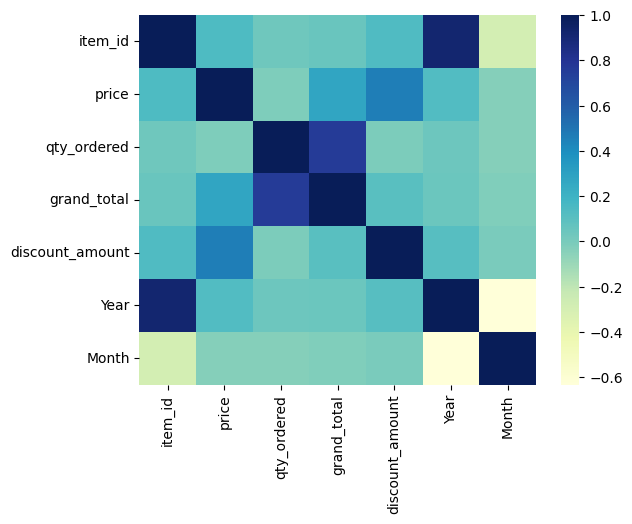

In [45]:
sns.heatmap(df5.corr(),cmap="YlGnBu")

Berdasarkan hubungan korelasi di atas, dapat dilihat hubungan korelasi yang paling kuat terjadi antara kolom-kolom sebagai berikut: 
- Year dengan item_id --> hal ini berkaitan dengan trend transaksi yang meningkat setiap tahunnya.
- grand_total dengan qty_ordered --> hal ini disebabkan karena perhitungan total bayar dipengaruhi dengan jumlah item yang dipesan.
- discount_amount dengan price --> hal ini menunjukkan diskon yang tinggi sejalan dengan harga yang tinggi, dengan kata lain hanya item-item yang memiliki harga tinggi yang mungkin diberikan diskon yang tinggi juga.

## **C. Data Analysis**

Pada tahap data analysis ini kita akan mencoba untuk menjawab beberapa pertanyaan berikut:  
1. Kapan periode transaksi paling tinggi ?
2. Apakah kategori produk paling laku (best-selling item) ?
3. Apakah metode pembayaran yang paling sering digunakan ?
4. Bagaimana kondisi status transaksi dari periode Juni 2016 hingga Agustus 2018 ?
5. Apakah terdapat hubungan antara metode pembayaran dan status pemesanan ?
6. Kapan periode diskon diberikan paling banyak ?  

**Soal No. 1**  
Kapan periode transaksi paling tinggi ?

a. Dalam periode Juli 2016 sampai Agustus 2018

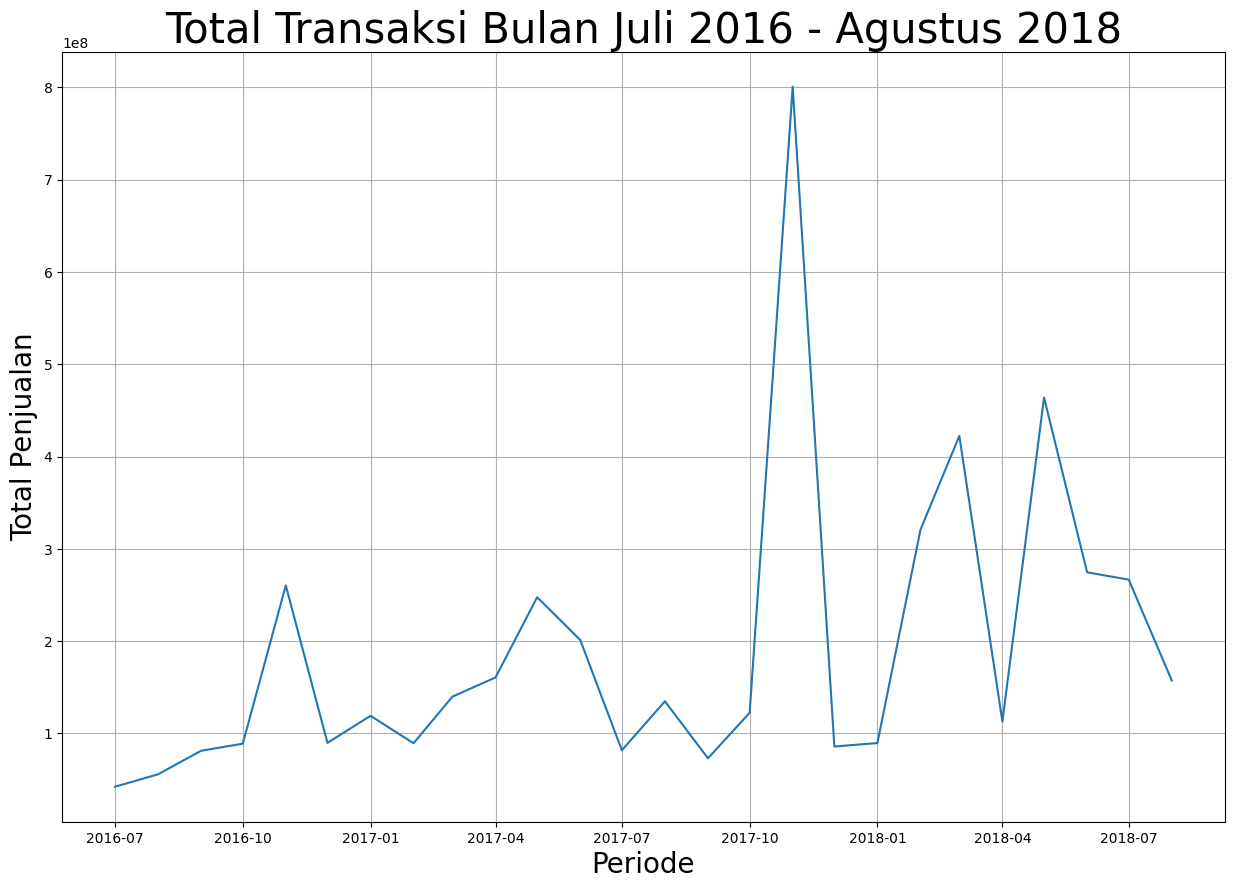

In [46]:
plt.figure(figsize=(15,10))
i = df5.groupby(['M-Y'])['grand_total'].sum().reset_index()

sns.lineplot(data= i, x = 'M-Y', y = 'grand_total')
plt.title('Total Transaksi Bulan Juli 2016 - Agustus 2018', size = 30)
plt.xlabel ('Periode', size = 20)
plt.ylabel ('Total Penjualan', size = 20)
plt.grid()

Transaksi tertinggi terjadi pada bulan November 2017, dapat dilihat pada tahun sebelumnya (2016), transaksi paling tinggi juga terjadi pada bulan November 2016. Hal ini kemungkinan berkaitan dengan peristiwa 'Black Friday' yang dirayakan di setiap bulan November 2011 di Pakistan. Sebagaimana dilansir pada [artikel](https://www.techjuice.pk/beyond-black-friday-why-pakistan-needs-its-own-indigenous-online-shopping-festival/), peningkatan transaksi online pada saat Black Friday disebabkan karena banyak brand besar untuk penawaran diskon dan marketing campaign (total hingga ratusan juta) untuk mempromosikan ' Black Friday' di e-commerce.  
Hal ini didukung oleh berita yang dicetak oleh [The Express Tribune tanggal 5 November 2015](https://tribune.com.pk/story/985145/black-friday-comes-to-pakistan/), dimana memang terdapat kenaikan transaksi e-commerce pada peristiwa 'Black Friday' di Pakistan sejak tahun 2015.

b. Rata-Rata Transaksi Per Tahun

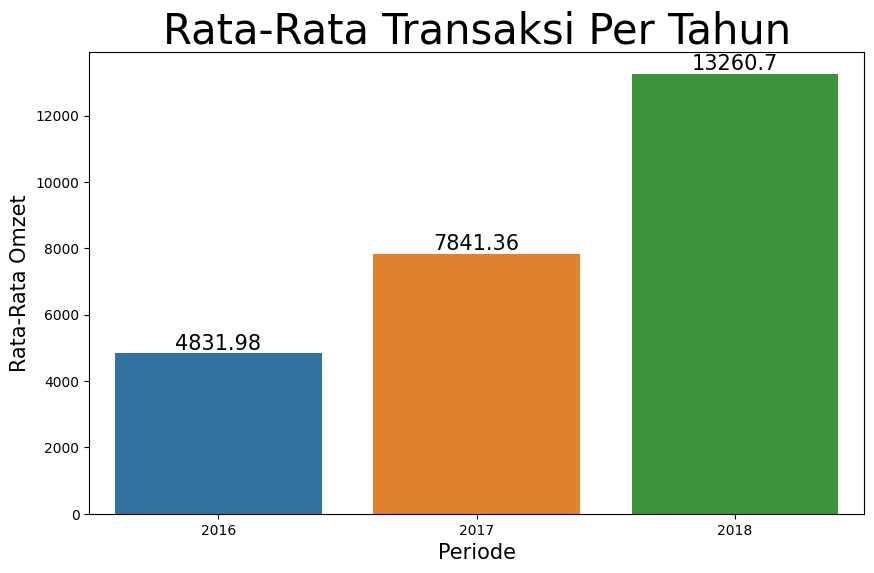

In [47]:
Year = [2016, 2017, 2018]
plt.figure(figsize=(10,6))
k= df5.groupby(['Year'])['grand_total'].mean().reset_index()

ax = sns.barplot(data= k, x = 'Year', y = 'grand_total')
plt.title('Rata-Rata Transaksi Per Tahun', size =30)
plt.xlabel ('Periode', size = 15)
plt.xticks(np.arange(3), Year)
plt.ylabel ('Rata-Rata Omzet', size = 15)

for i in ax.containers:
    ax.bar_label(i, size = 15)

Data transaksi periode 1 Juli 2016 sampai dengan 28 Agustus 2018, memberikan jumlah data yang tidak sama setiap bulannya, dimana:  
- tahun 2016 : terdapat 7 data
- tahun 2017 : terdapat 12 data
- tahun 2018 : terdapat 8 data  
 Oleh karena itu, analisa transaksi per tahun dilakukan dengan menggunakan nilai rata-rata.      
  Berdasarkan grafik di atas dapat dilihat terjadi peningkatan rata-rata transaksi dari tahun 2016 hingga tahun 2018, hal ini didukung dengan [data lain](https://www.ceicdata.com/en/pakistan/payment-system-statistics-transactions-by-payment-cards/ecommerce-transactions-volume-total) periode Sep 2016 hingga Des 2019 yang menunjukkan profil pertumbuhan transaksi melalui e-commerce naik secara agresif hingga bulan-bulan berikutnya.

**Soal No. 2**  
Apakah kategori produk paling laku (best-selling item) ?

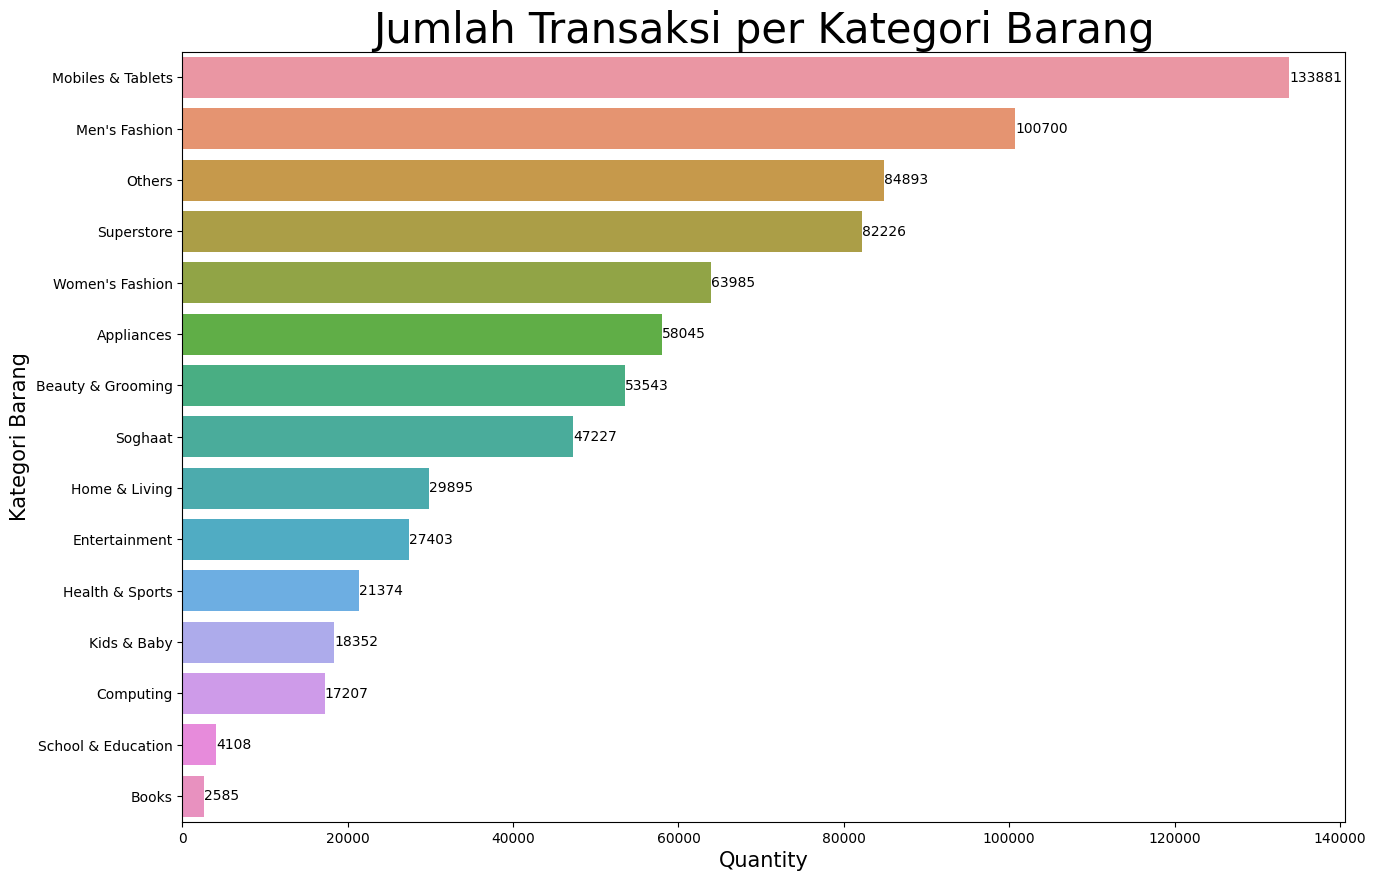

In [48]:
plt.figure(figsize=(15,10))
v= df5.groupby(['category_name_1'])['qty_ordered'].sum().reset_index()

ax = sns.barplot (data=v, y= 'category_name_1', x = 'qty_ordered', order=v.sort_values('qty_ordered',ascending=False).category_name_1)
plt.title('Jumlah Transaksi per Kategori Barang', size = 30)
plt.ylabel('Kategori Barang', size = 15)
plt.xlabel('Quantity', size = 15)

for i in ax.containers:
    ax.bar_label(i,)

Berdasarkan informasi grafik di atas, dapat dilihat bahwa kategori 'Mobiles & Tablet' menduduki peringkat pertama sebagai best-selling item di e-commerce Pakistan. Hal ini didukung oleh informasi pada [surat kabar Tribune](https://tribune.com.pk/story/985145/black-friday-comes-to-pakistan/) dimana peralatan elektronik menduduki kategori retail e-commerce paling menarik di seluruh dunia, dan diikuti dengan fashion. Tingginya demand 'Mobiles & Tablets' pada e-commerce dapat disebabkan karena diskon yang dapat diberikan di e-commerce lebih besar dibandingkan di offline store.

**Soal No. 3**  
Apakah metode pembayaran yang paling sering digunakan ?

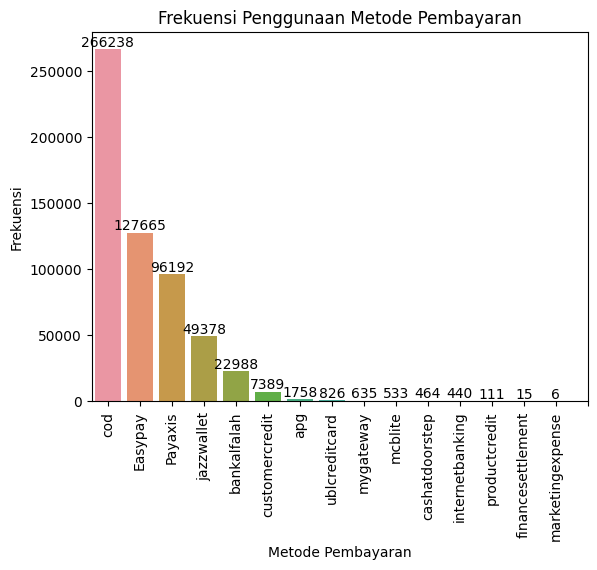

In [49]:
frekuensi = df5['payment_method'].value_counts().values
metode_pembayaran = df5['payment_method'].value_counts().index
ax = sns.barplot (data=df5, x= metode_pembayaran, y= frekuensi)
plt.title('Frekuensi Penggunaan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.xticks(np.arange(16), rotation = 90)
plt.ylabel('Frekuensi')

for i in ax.containers:
    ax.bar_label(i,)

Dapat disimpulkan bahwa metode pembayaran paling banyak yang digunakan di e-commerce Pakistan adalah cash on delivery (cod), mengacu pada [jurnal](https://journals.sagepub.com/doi/10.1177/2158244020917392), hal ini disebabkan karena masyarakat Pakistan masih enggan untuk mengadopsi pembayaran dengan menggunakan e-payment. Keamanan yang dirasakan terhadap penipuan online dan adanya kontrol yang dimiliki customer atas barang yang dipesan diamati sebagai alasan utama yang mendorong masyarakat Pakistan lebih senang menggunakan COD.    
Peringkat kedua diduduki oleh Easypay, berdasarkan [artikel]('https://www.southasiainvestor.com/2015/11/black-friday-sales-in-pakistan.html'), hal ini mungkin terjadi karena Easypay merupakan partner pembayaran resmi e-commerce yang menawarkan diskon tambahan 25% untuk customer yang menggunakan Easypay pada even "Black Friday."
Adapun metode pembayaran ketiga adalah [Payaxis](https://www.tpsworldwide.com/wp-content/uploads/2018/05/payaxis.pdf) yang merupakan portal pembayaran thirdparty yang menyediakan instrumen pembayaran melalui kartu, dompet digital, internet banking. 

**Soal No. 4**  
Bagaimana kondisi status transaksi dari periode Juli 2016 hingga Agustus 2018 ?

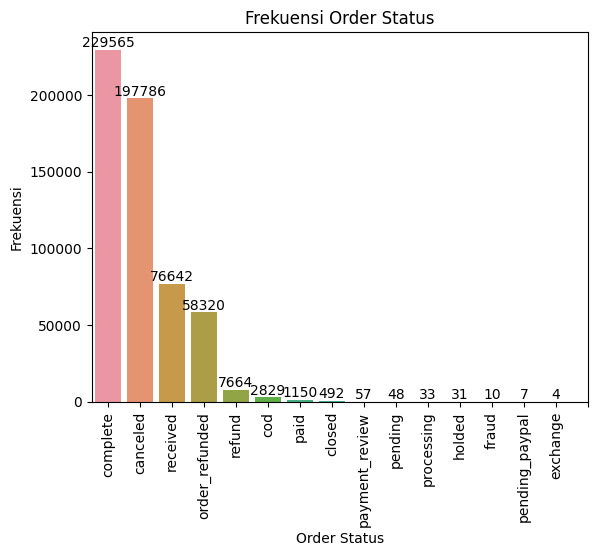

In [50]:
frekuensi = df5['status'].value_counts().values
order_status = df5['status'].value_counts().index
ax = sns.barplot (data=df5, x= order_status, y = frekuensi)
plt.title('Frekuensi Order Status')
plt.xlabel('Order Status')
plt.xticks(np.arange(16), rotation = 90)
plt.ylabel('Frekuensi')

for i in ax.containers:
    ax.bar_label(i)

Tingginya angka order cancel saat berbelanja melalui e-commerce di Pakistan disebabkan karena tingginya peristiwa online shop 'berbohon'g mengenai jumlah inventory, sehingga banyaknya customer yang sudah memesan namun nyatanya barang yang dipesan tidak tersedia. Adapun proses refund memakan waktu yang cukup lama hingga berminggu-minggu atau berbulan-bulan.   
Hilangnya kepercayaan masyarakat Pakistan terhadap online shop yang dianggap 'berbohong' hanya untuk memenangkan kompetensi pasar, dapat menyebabkan penurunan jumlah customer beberapa tahun seterusnya sebagaimana dilansir pada [artikel](https://propakistani.pk/2015/05/13/online-shops-lie-about-their-inventory-and-this-is-killing-e-commerce-industry-in-pakistan/) berikut ini.

**Soal No. 5**  
Apakah terdapat hubungan antara metode pembayaran dan status pemesanan ?

In [51]:
plt.figure(figsize=(15,10))
new_tab = df5[['payment_method', 'status']]
stack = new_tab.groupby(['payment_method','status']).size().reset_index(name='count')
stack['Percentage'] = 100 * stack['count'] / stack.groupby('payment_method')['count'].transform('sum')
fig = px.bar(stack, x="status", y="count", color="payment_method", text=stack['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)), title="Hubungan Metode Pembayaran dengan Status Pemesanan", height=600)
fig.show()

<Figure size 1500x1000 with 0 Axes>

Berdasarkan grafik di atas, dapat disimpulkan bahwa order complete didominasi dengan pembayaran COD, hal ini sesuai dengan pernyataan bahwa metode pembayaran COD masih mendominasi transaksi e-commerce di Pakistan. 
Sedangkan status transaksi cancel, paling banyak terjadi pada metode pembayaran Payaxis dan Easypay bukan dari COD, hal ini sesuai dengan informasi pada [artikel](https://www.southasiainvestor.com/2015/11/black-friday-sales-in-pakistan.html) dimana banyak masyarakat yang mengalami order cancelled karena online shop dianggap 'berbohong' terkait jumlah inventory item yang dijual atau bahkan sedang sale jika menggunakan metode pembayaran tertentu (misal: Easypay).

**Soal No. 6**  
Kapan periode diskon diberikan paling banyak ?

a. Dalam periode Juli 2016 sampai Agustus 2018

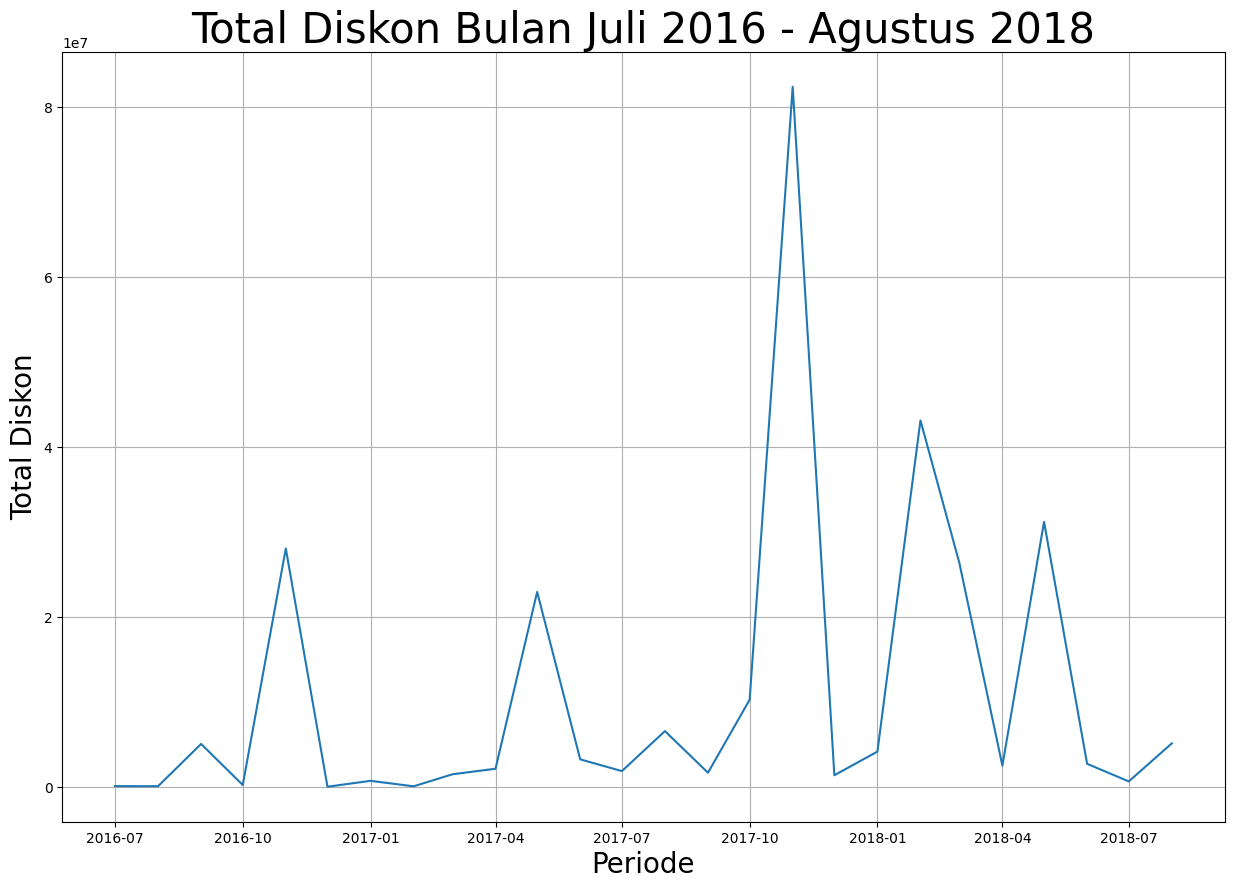

In [52]:
plt.figure(figsize=(15,10))
l = df5.groupby(['M-Y'])['discount_amount'].sum().reset_index()

sns.lineplot(data= l, x = 'M-Y', y = 'discount_amount')
plt.title('Total Diskon Bulan Juli 2016 - Agustus 2018', size = 30)
plt.xlabel ('Periode', size = 20)
plt.ylabel ('Total Diskon', size = 20)
plt.grid()

Total diskon diberikan paling tinggi pada bulan November 2017, dimana hal ini sesuai dengan informasi yang disampaikan pada soal no. 1 bahwa pada bulan November bertepatan dengan peristiwa 'black_friday'. Dilansir pada [artikel](https://creativekhadija.com/2017/11/popular-brands-offering-black-friday-deals-2017-pakistan/) berikut ini, dimana semua online shop berlomba-lomba memberikan 'Mega Diskon' pada saat peristiwa Black Friday.

b. Rata-rata diskon per tahun

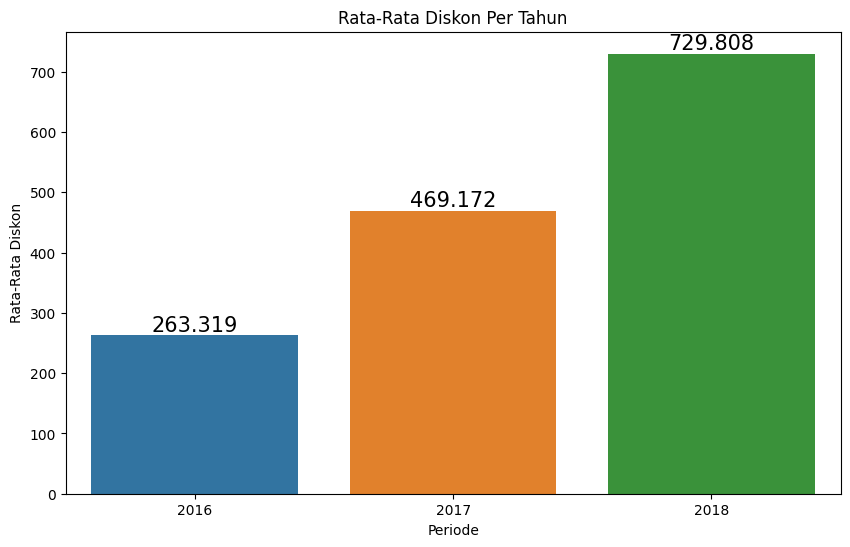

In [53]:
Year = [2016, 2017, 2018]
plt.figure(figsize=(10,6))
n= df5.groupby(['Year'])['discount_amount'].mean().reset_index()

ax = sns.barplot(data= n, x = 'Year', y = 'discount_amount')
plt.title('Rata-Rata Diskon Per Tahun')
plt.xlabel ('Periode')
plt.xticks(np.arange(3), Year)
plt.ylabel ('Rata-Rata Diskon')

for i in ax.containers:
    ax.bar_label(i, size = 15)

Berdasarkan grafik di atas, diperoleh informasi bahwa jumlah diskon yang diberikan setiap tahunnya mengalami peningkatan, hal ini menunjukkan semakin banyak brand dan online shop di Pakistan yang mulai masuk ke e-commerce dan aktif berkontribusi memberikan diskon yang besar.

## **D. Kesimpulan**

Berdasarkan hasil analisa yang dilakukan, dapat kita tarik kesimpulan sebagai berikut:
1. Penjualan tertinggi terjadi pada bulan November dimana bertepatan dengan peristiwa 'Black Friday'. Adapun terdapat peningkatan transaksi e-commerce dari tahun ke tahun.
2. Kategori produk yang paling laku adalah 'Mobiles & Tablet' dengan perbandingan nilai yang sangat jauh dibandingkan kategori lainnya, seperti fashion.
3. Top 3 metode pembayaran antara lain: COD, Easypay, Payaxis, dimana ketiga pembayaran tersebut sudah dipahami oleh masyarakat sejak lama serta menggaransi rasa aman dan nyaman saat berbelanja.
4. Tingginya angka 'order canceled' disebabkan oleh karena online shop yang tidak melakukan penyesuaian stok inventory dengan stok yang tercantum di website, terkait hal ini online shop perlu memperbaiki sistem pencatatan stok opname, sehingga online shop tidak kehilangan customer.
5. Status 'order complete' paling banyak terjadi pada metode pembayaran 'cod', adapun metode 'order canceled' justru paling banyak terjadi pada metode pembayaran menggunakan 'easypay' dan 'payaxis'. Lamanya waktu tunggu untuk proses refund dana yang 'order cancel' dapat menyebabkan customer tidak tertarik berbelanja online lagi.
6. Jumlah diskon tertinggi diberikan pada bulan November 2011, hal ini sesuai dengan peristiwa 'Black Friday'. Terjadi peningkatan jumlah diskon dari tahun ke tahun menunjukkan banyaknya online shop yang ikut berpartisipasi memberikan diskon pada saat peristiwa 'Black Friday'.


## **E. Rekomendasi**

Transaksi e-commerce di Pakistan menunjukkan profil yang naik dari tahun ke tahun memberikan sinyal positif untuk dapat memulai business di e-commerce Pakistan, adapun berikut adalah rekomendasi kami:
1. Pengusaha dapat memanfaatkan hari libur nasional atau peristiwa seperti Black Friday untuk dapat masuk ke dalam pasar. Pada hari-hari besar seperti Natal, tahun baru, lebaran, Black-Friday, atau even bulanan seperti (1.1 , 2.2, ..., 12.12) juga merupakan waktu yang paling baik untuk mempromosikan produk.
2. Item yang disarankan untuk dijual adalah gadget dikarenakan pasarnya sangat mendominasi e-commerce.
3. Dalam memilih e-commerce, pastikan metode pembayaran menggunakan metode COD, easypay, dan payaxis sudah dapat digunakan di e-commerce tersebut.
4. Diskon yang besar dan berkala akan meningkatkan trafic customer ke toko dan produk kita, serta membuat toko kita lebih unggul dibandingkan toko lainnya.
Adapun diskon dapat diberikan dalam bentuk: reward pendaftaran, reward first user, reward dengan minimal belanja berupa voucher yang dapat digunakan pada pembelanjaan berikutnya akan meningkatkan kemungkinan adanya transaksi kedua dan seterusnya.
5. Untuk mencegah tingginya angka 'ordered canceled', selalu pastikan stok opname barang inventory sesuai dengan stok website, sehingga konversi customer pindah ke toko lain berkurang.
6. Selalu berikan service yang baik ke customer dalam rangka meningkatkan loyalitas customer dan membuat toko kita lebih unggul dibandingkan toko lainnya. 